<a href="https://colab.research.google.com/github/Siddhant254/Ecommerce-Analytics-customer-segmentation-project/blob/master/Ecommerce_Analytics_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Data
df = pd.read_csv('/content/drive/MyDrive/DS Data/E-com_Data.csv')

In [5]:
# Top 5 records
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [6]:
# Last 5 records
df.tail()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
541111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [8]:
# Percentage of Null values in each column
(df.isnull().sum()/len(df))*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [9]:
# columns
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [10]:
# Dropping irrelevant columns
df = df.drop(['Item Code','Quantity','Time','price per Unit','Shipping Location',
              'Cancelled_status', 'Reason of return', 'Sold as set'],axis=1)

df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [11]:
# Duplicates
df.duplicated().sum()

6008

In [12]:
# Dropping duplicate values
df = df.drop_duplicates(ignore_index=True)

In [13]:
# Duplicates
df.duplicated().sum()

0

In [14]:
# Renaming columns
df = df.rename(columns = {'InvoieNo':'Invoice_No' , 'Date of purchase':'Date'})
df.head()


,CustomerID,Invoice_No,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [15]:
# Null values
df.isnull().sum()

CustomerID    132249
Invoice_No         1
Date               1
Price              1
dtype: int64

In [16]:
# Dropping missing values where value is missing in CustomerId column
df = df.dropna(subset = ['CustomerID'])

In [17]:
# Null values
df.isnull().sum()

CustomerID    0
Invoice_No    0
Date          0
Price         0
dtype: int64

# Working with Date Column

In [18]:
# Import datetime package
import datetime as dt

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   Invoice_No  402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [20]:
# Converting date column type from string to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   Invoice_No  402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [22]:
# Statistical summary of Date column
df['Date'].describe()


count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [23]:
# Latest date
latest_date = dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

# RFM Analysis

In [24]:
# Customer segmentation based of Customer ID
RFMScore = df.groupby('CustomerID').agg({'Date': lambda x : (latest_date - x.max()).days,
                                         'Invoice_No' : lambda x : x.count(),
                                         'Price' : lambda x : x.sum()})

# Renaming Columns
RFMScore.rename(columns = {'Date':'Recency','Invoice_No':'Frequency','Price':'Monetory'},inplace=True)

In [25]:
RFMScore

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0
...,...,...,...
4368.0,17,10,20480.0
4369.0,181,7,10774.0
4370.0,12,13,24962.0


In [26]:
# Resetting index
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,751,279720.0


# SEGMENTATION

In [27]:
# Columns
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [28]:
RFMScore['Recency'].describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [29]:
RFMScore['Frequency'].describe()

count    4349.000000
mean       92.632559
std       230.742279
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7919.000000
Name: Frequency, dtype: float64

In [30]:
RFMScore['Monetory'].describe()

count    4.349000e+03
mean     2.294939e+05
std      8.556685e+05
min     -5.037200e+04
25%      3.814000e+04
50%      8.363500e+04
75%      2.054440e+05
max      3.547209e+07
Name: Monetory, dtype: float64

In [31]:
# Percentile values
percentile = RFMScore.quantile(q = [0.25,0.50,0.75])

# Converting to dictionary
percentile = percentile.to_dict()

percentile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [32]:
# Creating a function for allocating recency score

def Recency_score(x,p,d): # Here x = Data point to be evaluated , p = percentile value , d = percentile dictionary

  if x <= d[p][0.25]: # If percentile value of data point less than 25th percentile value then return 1
    return 1

  elif x <= d[p][0.50] : # If percentile value of data point less than 50th percentile value then return 2
    return 2

  elif x <= d[p][0.75]: # If percentile value of data point less than 75th percentile value then return 3
    return 3

  else:
    return 4

In [33]:
# Creating Recency score column
RFMScore['R'] = RFMScore['Recency'].apply(Recency_score , args=('Recency',percentile,))

In [34]:
RFMScore

,Recency,Frequency,Monetory,R
CustomerID,,,,
2.0,4,181,550416.0,1
3.0,77,27,257404.0,4
4.0,20,72,176613.0,3
5.0,18,16,41976.0,2
6.0,9,84,151822.0,1
...,...,...,...,...
4368.0,17,10,20480.0,2
4369.0,181,7,10774.0,4
4370.0,12,13,24962.0,2


In [35]:
# Creating a function for allocating frequency score and Monetory score
def fm_score(x,p,d): # Here x = Data point to be evaluated , p = percentile value , d = percentile dictionary

  if x <= d[p][0.25]: # If percentile value of data point less than 25th percentile value then return 4
    return 4

  elif x <= d[p][0.50] : # If percentile value of data point less than 50th percentile value then return 3
    return 3

  elif x <= d[p][0.75]: # If percentile value of data point less than 75th percentile value then return 2
    return 2

  else:
    return 1

In [36]:
# Creating frequency_score and monetory_score columns
RFMScore['F'] = RFMScore['Frequency'].apply(fm_score , args=['Frequency',percentile,])
RFMScore['M'] = RFMScore['Monetory'].apply(fm_score , args=['Monetory',percentile,])

In [37]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [38]:
# Combining RFM values in a string and making a column
RFMScore['RFM'] = RFMScore['R'].map(str) + RFMScore['F'].map(str) + RFMScore['M'].map(str)
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,111
1,3.0,77,27,257404.0,4,3,1,431
2,4.0,20,72,176613.0,3,2,2,322
3,5.0,18,16,41976.0,2,4,3,243
4,6.0,9,84,151822.0,1,2,2,122
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244
4345,4369.0,181,7,10774.0,4,4,4,444
4346,4370.0,12,13,24962.0,2,4,4,244
4347,4371.0,4,751,279720.0,1,1,1,111


In [39]:
# Summing the RFM Scores of the RFM column
RFMScore['RFM_Score'] = RFMScore[['R','F','M']].sum(axis=1)
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score
0,2.0,4,181,550416.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10
4345,4369.0,181,7,10774.0,4,4,4,444,12
4346,4370.0,12,13,24962.0,2,4,4,244,10
4347,4371.0,4,751,279720.0,1,1,1,111,3


In [40]:
# Value counts
RFMScore['RFM_Score'].value_counts()

3     509
10    480
9     460
8     451
7     439
12    408
11    404
5     402
6     399
4     397
Name: RFM_Score, dtype: int64

In [41]:
# Creating a list of customer segments
Loyal_customer = ['Platinum','Gold','Silver','Bronze']
score_cuts = pd.qcut(RFMScore['RFM_Score'], q=4, labels=Loyal_customer) # Dividing the score values into four equal quantiles
RFMScore['Loyal_customer'] = score_cuts.values
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyal_customer
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,444,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,244,10,Silver
4347,4371.0,4,751,279720.0,1,1,1,111,3,Platinum


In [42]:
RFMScore = RFMScore.reset_index()
RFMScore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyal_customer
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,444,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,244,10,Silver
4347,4371.0,4,751,279720.0,1,1,1,111,3,Platinum


# VISUALIZATION

In [43]:
new_datapoint = RFMScore.groupby('Loyal_customer')[['Recency', 'Frequency','Monetory','CustomerID']].agg({
    'Recency':'sum', 'Frequency':'sum', 'Monetory':'sum','CustomerID':'nunique'}).reset_index()

In [44]:
new_datapoint = new_datapoint.rename(columns = {'CustomerID':"No_Of_Customer"} )
new_datapoint

,Loyal_customer,Recency,Frequency,Monetory,No_Of_Customer
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [45]:
# Percentage of customers
new_datapoint['Percentage'] = round(new_datapoint['No_Of_Customer'] / new_datapoint.No_Of_Customer.sum()*100, 2)

In [46]:
new_datapoint

,Loyal_customer,Recency,Frequency,Monetory,No_Of_Customer,Percentage
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [49]:
# Visualization
import squarify # Used for plotting tree map

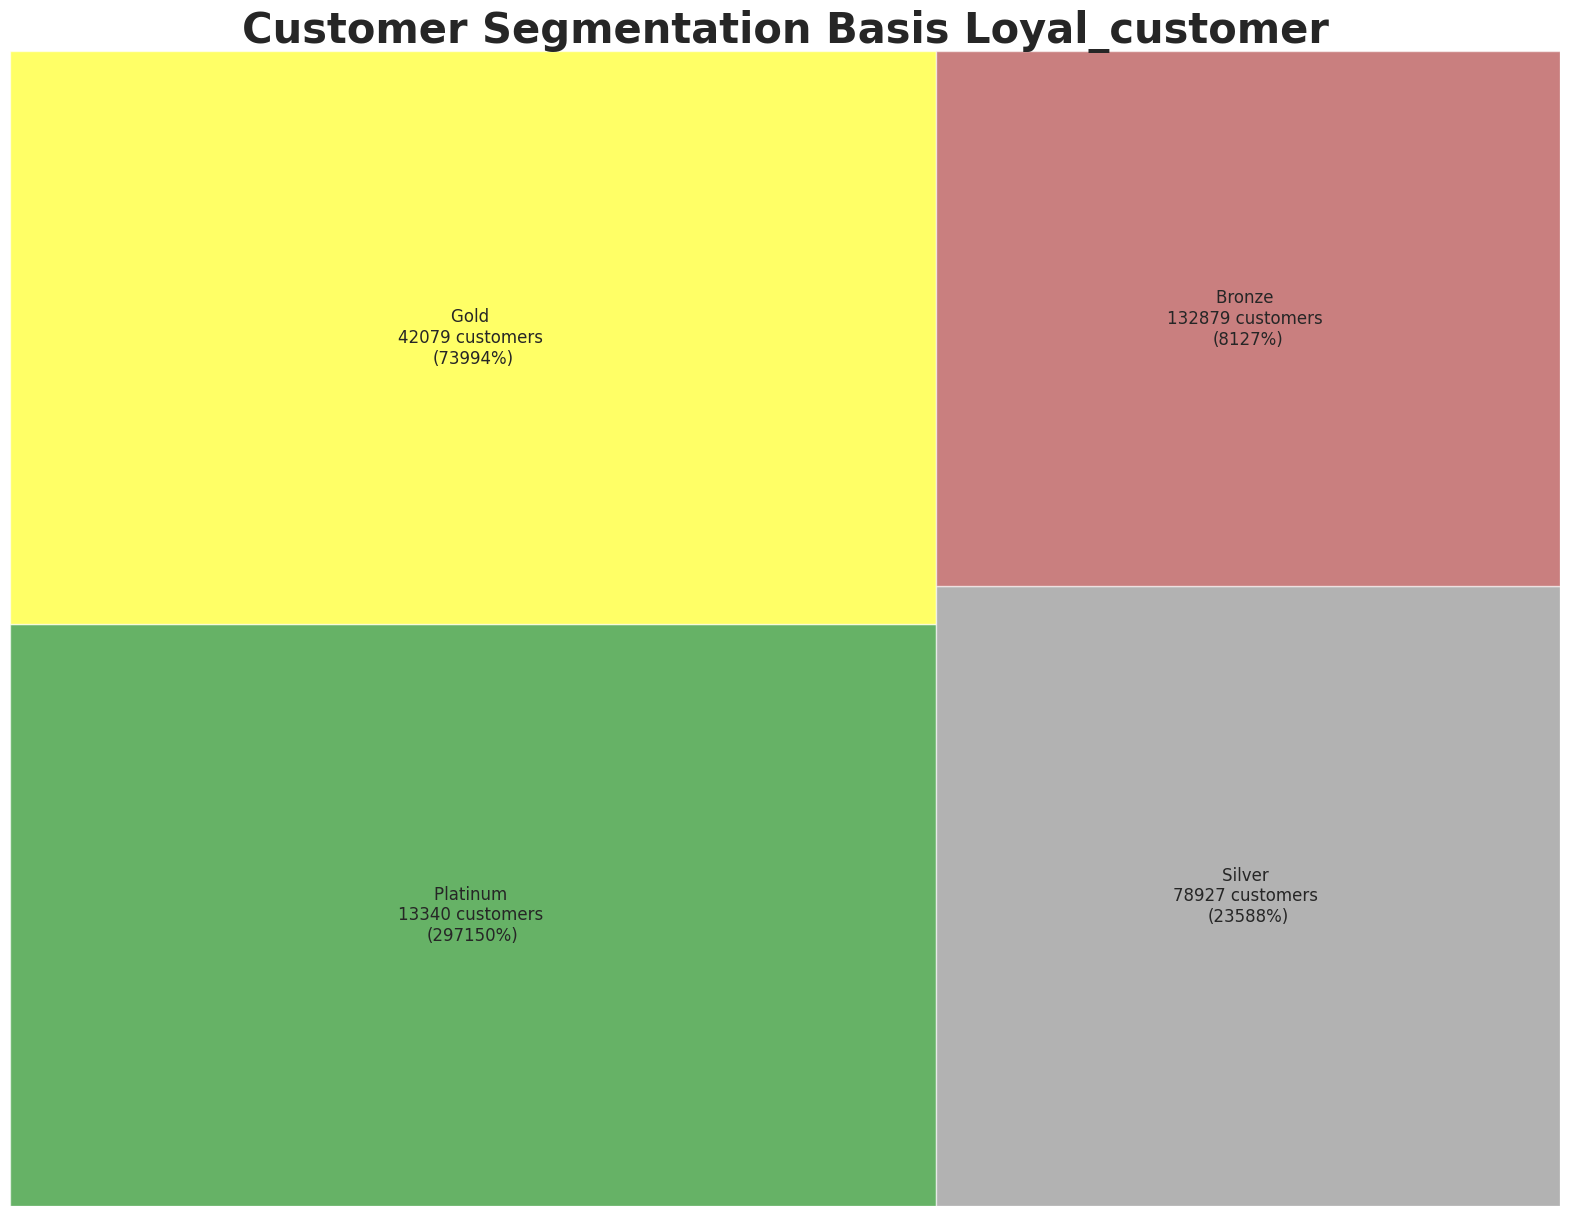

In [56]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dics = {'Platinum':'green', 'Gold':"yellow",'Silver':'gray','Bronze':'brown'}

squarify.plot(sizes=new_datapoint['No_Of_Customer'],color=colors_dics.values(),
             label = ['{} \n{:.0f} customers \n({}%)'.format(*new_datapoint.iloc[i])
                      for i in range(0, len(new_datapoint))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyal_customer", fontsize=30, fontweight='bold')
plt.axis("off")
plt.show()

# K-MEANS Model

In [57]:
# Input features
RFMScore1 = RFMScore.iloc[:,1:4]
RFMScore1

,Recency,Frequency,Monetory
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0
...,...,...,...
4344,17,10,20480.0
4345,181,7,10774.0
4346,12,13,24962.0
4347,4,751,279720.0


In [58]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
RFMScore1_sc = sc.fit_transform(RFMScore1)
RFMScore1_sc

array([[-0.64079551,  0.38301434,  0.37509732],
       [ 0.17351282, -0.28447368,  0.0326216 ],
       [-0.46231697, -0.08942848, -0.06180783],
       ...,
       [-0.55155624, -0.34515441, -0.23905922],
       [-0.64079551,  2.85358691,  0.05870479],
       [-0.1165148 , -0.10676583,  0.0320933 ]])

In [59]:
scaled_data = pd.DataFrame(RFMScore1_sc, index=RFMScore1.index, columns= RFMScore1.columns)
scaled_data

,Recency,Frequency,Monetory
0,-0.640796,0.383014,0.375097
1,0.173513,-0.284474,0.032622
2,-0.462317,-0.089428,-0.061808
3,-0.484627,-0.332151,-0.219173
4,-0.585021,-0.037416,-0.090784
...,...,...,...
4344,-0.495782,-0.358157,-0.244298
4345,1.333623,-0.371160,-0.255642
4346,-0.551556,-0.345154,-0.239059
4347,-0.640796,2.853587,0.058705


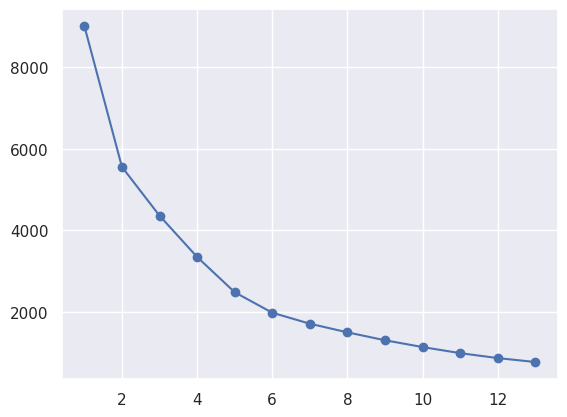

In [63]:
# K-MEANS
from sklearn.cluster import KMeans

wcss = []

for i in range(2,15):
    KM = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

# Elbow method
abc = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(abc, wcss , marker = 'o')

In [64]:
# Prediction
KM = KMeans(n_clusters=8, init='k-means++',max_iter=1000, random_state=1)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([0, 4, 4, ..., 4, 6, 4], dtype=int32)

In [65]:
scaled_data['Cluster'] = KM.labels_

In [66]:
scaled_data

,Recency,Frequency,Monetory,Cluster
0,-0.640796,0.383014,0.375097,0
1,0.173513,-0.284474,0.032622,4
2,-0.462317,-0.089428,-0.061808,4
3,-0.484627,-0.332151,-0.219173,4
4,-0.585021,-0.037416,-0.090784,4
...,...,...,...,...
4344,-0.495782,-0.358157,-0.244298,4
4345,1.333623,-0.371160,-0.255642,7
4346,-0.551556,-0.345154,-0.239059,4
4347,-0.640796,2.853587,0.058705,6


In [67]:
scaled_data['Cluster'].value_counts()

4    2643
0     700
7     500
1     353
6     135
5      13
3       4
2       1
Name: Cluster, dtype: int64